In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

In [28]:
pr = xr.open_dataset('./Extraction_pr.nc')
temp = xr.open_dataset('./Extraction_tas.nc')


**Function to Take Mean Later**

In [29]:
def mean(x):
    return (x.mean())

**Average across GCM's, latitude, longitude to get mean precip over domain**

In [30]:
precip = pr.pr.mean(dim = 'projection').mean(dim = 'latitude').mean(dim = 'longitude')
temp = temp.tas.mean(dim = 'projection').mean(dim = 'latitude').mean(dim = 'longitude')

**Take out the Years Interested In Comparing**

In [74]:
current_precip = precip.sel(time=slice('1987-01-01', '2017-01-01'))
future_precip = precip.sel(time=slice('2020-01-01', '2050-01-01'))

experiment = ds.pr.mean(dim = 'latitude').mean(dim ='longitude')

In [75]:
current_temp = temp.sel(time=slice('1980-01-01', '2010-01-01'))
future_temp = temp.sel(time=slice('2020-01-01', '2050-01-01'))

In [76]:
#max_pr.groupby('time.year').apply(mean).plot() # I was attempting to use this to fine max and min projections 
#min_pr.groupby('time.year').apply(mean).plot()

**Group By Month and Take the Monthly Mean**



In [77]:
future_pr_mm = future_precip.groupby('time.month').apply(mean)
current_pr_mm = current_precip.groupby('time.month').apply(mean)

In [78]:
future_temp_mm = future_temp.groupby('time.month').apply(mean)
current_temp_mm = current_temp.groupby('time.month').apply(mean)

**Create Dataframes**

In [79]:
pr_c = current_pr_mm.to_dataframe()
pr_f = future_pr_mm.to_dataframe()

In [80]:
t_c = current_temp_mm.to_dataframe()
t_f = future_temp_mm.to_dataframe()

**Rearrange so that is in Water Year Shape**

In [81]:
precip_future = [pr_f['pr'][10],pr_f['pr'][11],pr_f['pr'][12],pr_f['pr'][1],pr_f['pr'][2],pr_f['pr'][3]
                         ,pr_f['pr'][4],pr_f['pr'][5],pr_f['pr'][6],pr_f['pr'][7],pr_f['pr'][8],pr_f['pr'][9]]

precip_current= [pr_c['pr'][10],pr_c['pr'][11],pr_c['pr'][12],pr_c['pr'][1],pr_c['pr'][2],pr_c['pr'][3]
                         ,pr_c['pr'][4],pr_c['pr'][5],pr_c['pr'][6],pr_c['pr'][7],pr_c['pr'][8],pr_c['pr'][9]]

In [82]:
temp_future = [t_f['tas'][10],t_f['tas'][11],t_f['tas'][12],t_f['tas'][1],t_f['tas'][2],t_f['tas'][3]
                         ,t_f['tas'][4],t_f['tas'][5],t_f['tas'][6],t_f['tas'][7],t_f['tas'][8],t_f['tas'][9]]

temp_current= [t_c['tas'][10],t_c['tas'][11],t_c['tas'][12],t_c['tas'][1],t_c['tas'][2],t_c['tas'][3]
                         ,t_c['tas'][4],t_c['tas'][5],t_c['tas'][6],t_c['tas'][7],t_c['tas'][8],t_c['tas'][9]]

In [83]:
x = [10,11,12,1,2,3,4,5,6,7,8,9]

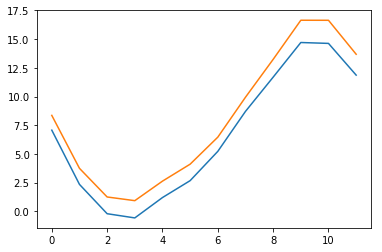

In [84]:
plt.plot(temp_current)
plt.plot(temp_future)

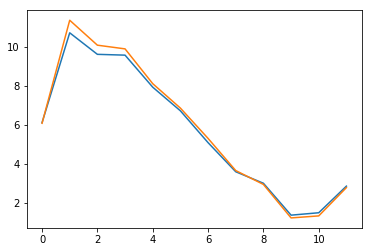

In [85]:
plt.plot(precip_current)
plt.plot(precip_future)

In [86]:
precip_plot = 1 - np.asarray(precip_current)/np.asarray(precip_future)

temp_plot = np.asarray(temp_future) - np.asarray(temp_current)

In [87]:
precip_plot

array([-0.00546479,  0.05683541,  0.04666799,  0.03256303,  0.02229106,
        0.02037436,  0.04117614,  0.01671773, -0.02069485, -0.11761189,
       -0.12358212, -0.02704489], dtype=float32)

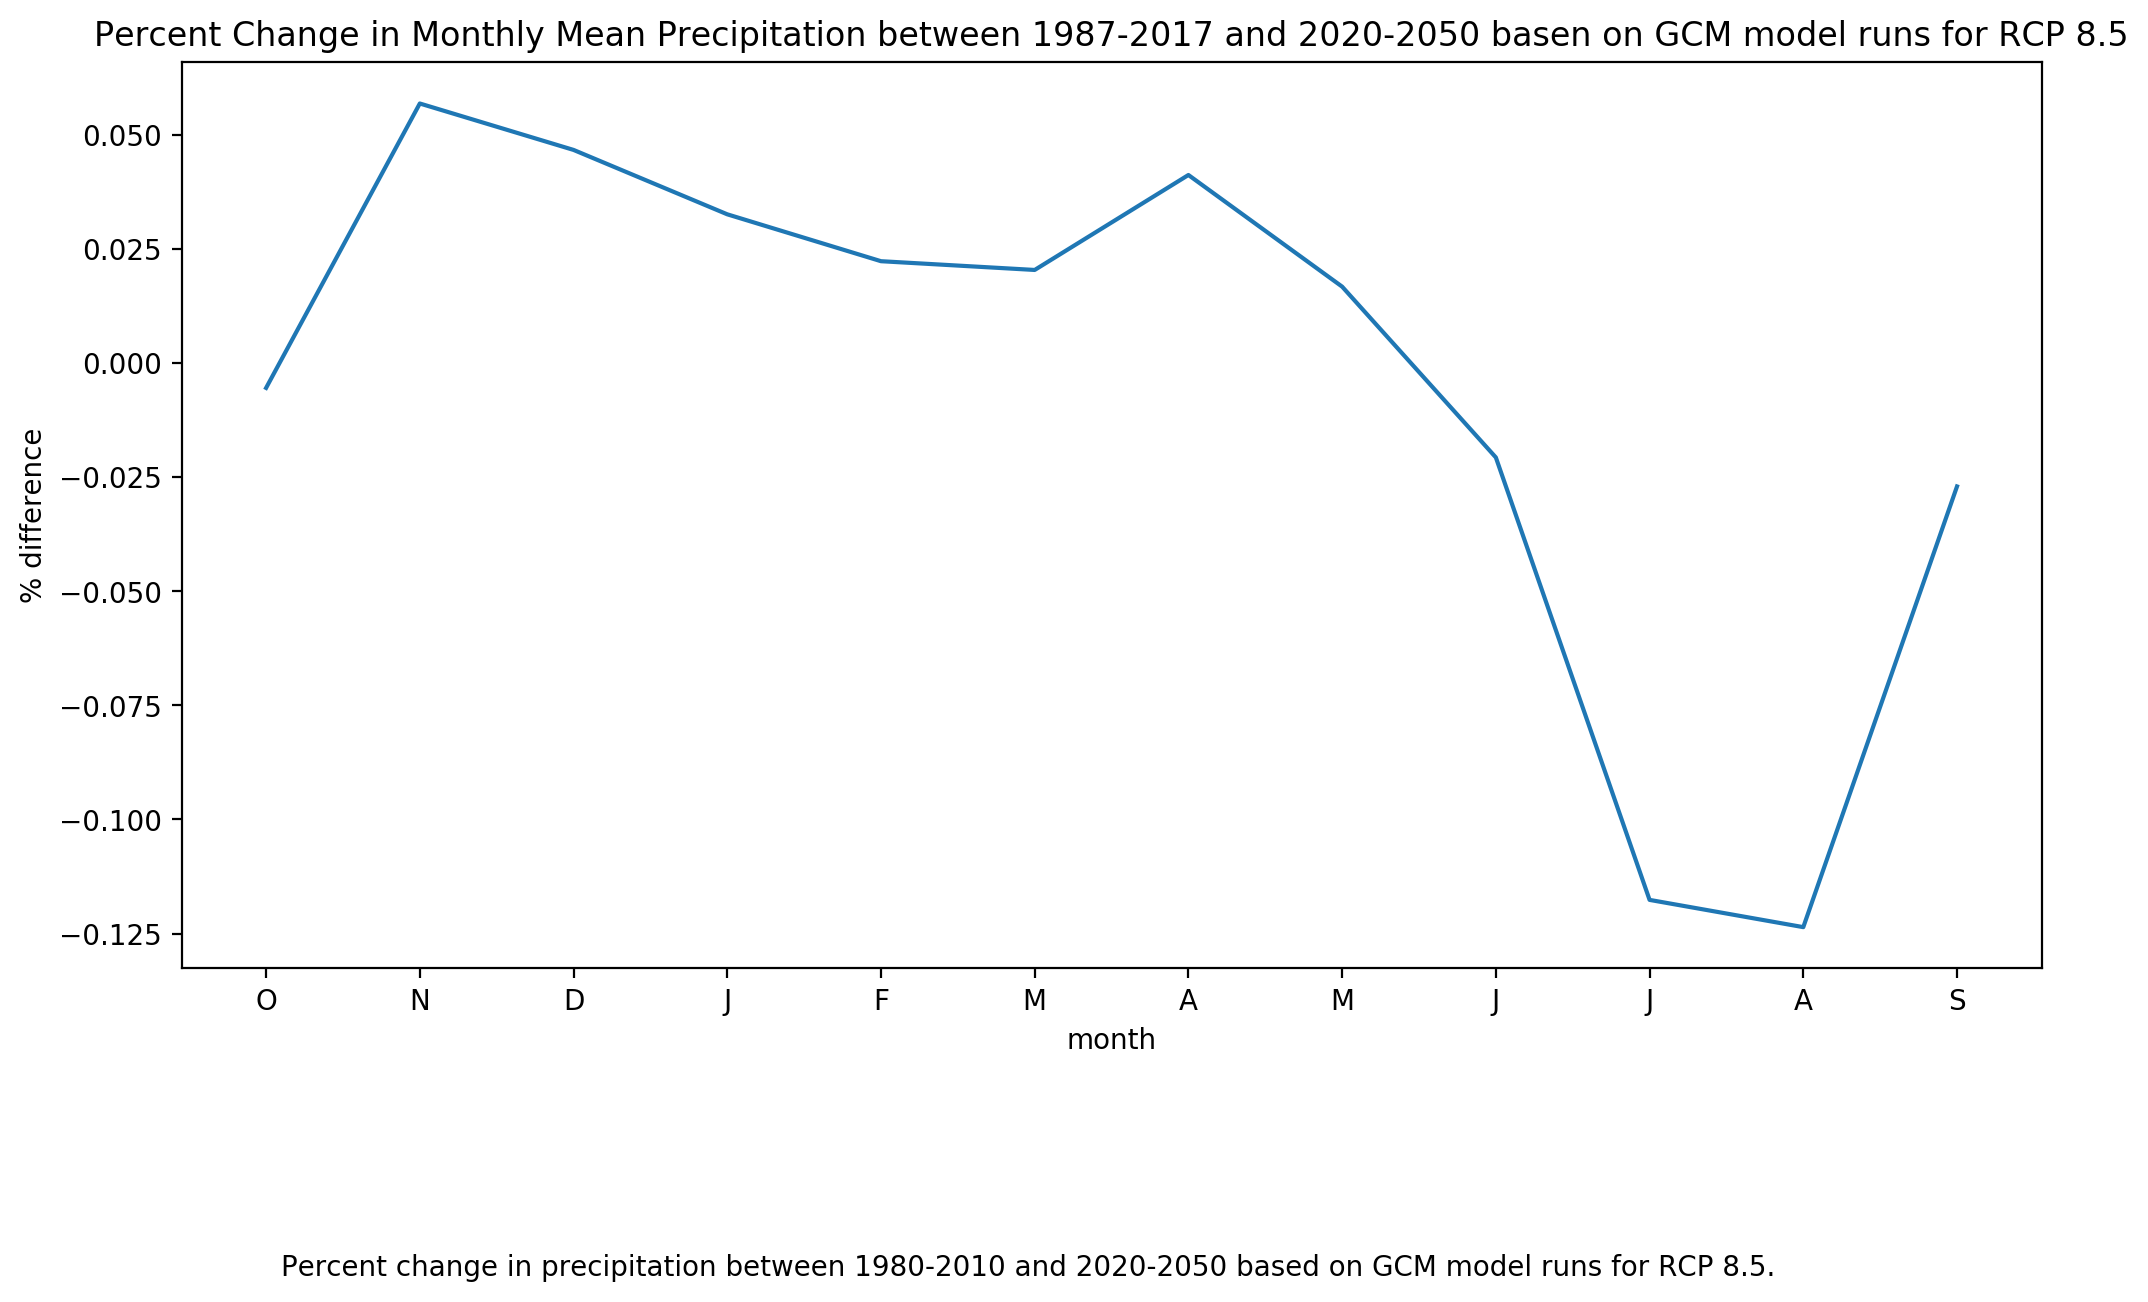

In [94]:
txt = "Percent change in precipitation between 1980-2010 and 2020-2050 based on GCM model runs for RCP 8.5."

plt.figure(num=None, figsize=(12, 6), dpi=200, facecolor='w', edgecolor='k')
fig = plt.plot(precip_plot)
plt.text(0.1, -0.2, txt)

plt.xticks(np.arange(0,12,1),['O','N','D','J','F','M','A','M','J','J','A','S'])
plt.xlabel('month')
plt.ylabel('% difference')
plt.title('Percent Change in Monthly Mean Precipitation between 1987-2017 and 2020-2050 basen on GCM model runs for RCP 8.5')
plt.savefig('delta%')

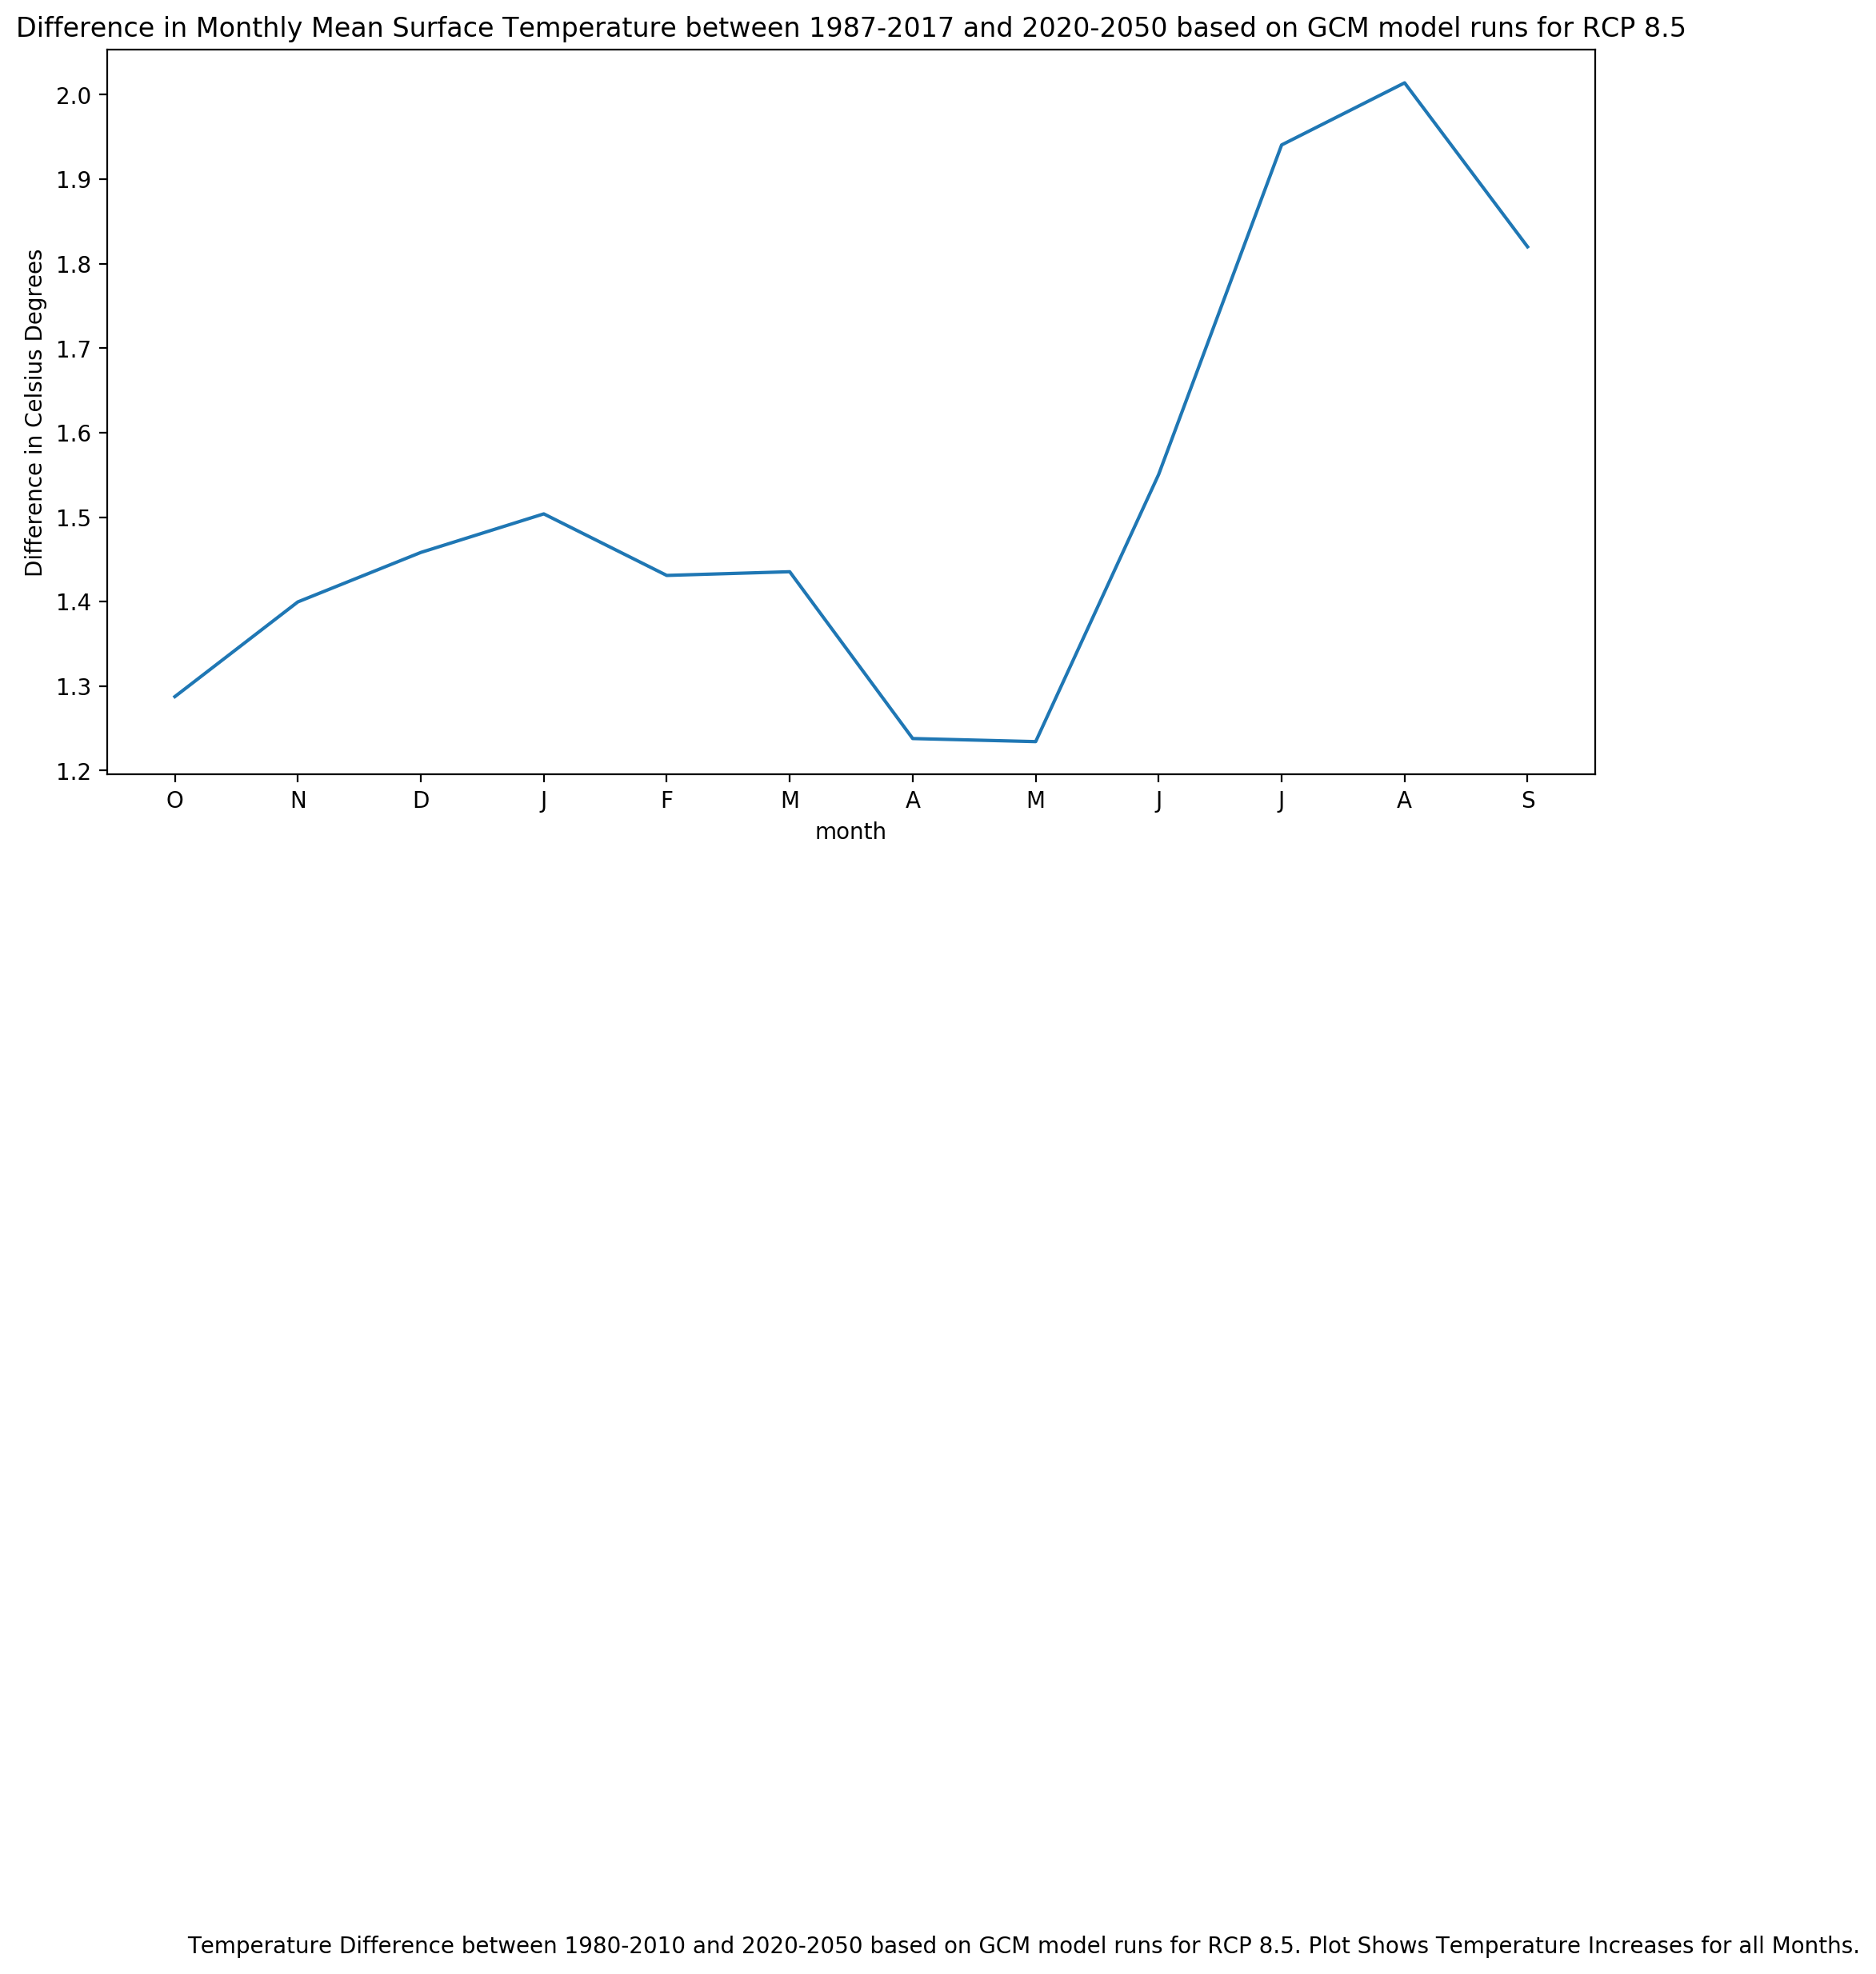

In [95]:
txt = "Temperature Difference between 1980-2010 and 2020-2050 based on GCM model runs for RCP 8.5. Plot Shows Temperature Increases for all Months."

plt.figure(num=None, figsize=(12, 6), dpi=200, facecolor='w', edgecolor='k')
fig = plt.plot(temp_plot)
plt.text(0.1, -0.2, txt)

plt.xticks(np.arange(0,12,1),['O','N','D','J','F','M','A','M','J','J','A','S'])
plt.xlabel('month')
plt.ylabel('Difference in Celsius Degrees')
plt.title('Difference in Monthly Mean Surface Temperature between 1987-2017 and 2020-2050 based on GCM model runs for RCP 8.5')
plt.savefig('temp_diff')